<a href="https://colab.research.google.com/github/Anushka31raut/Practicalandlab/blob/main/UGMR_2023_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

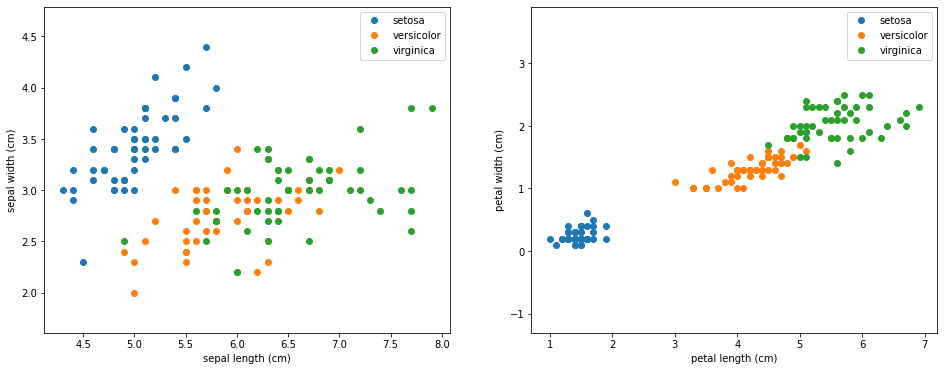

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 667.06it/s]


# Plot training progress

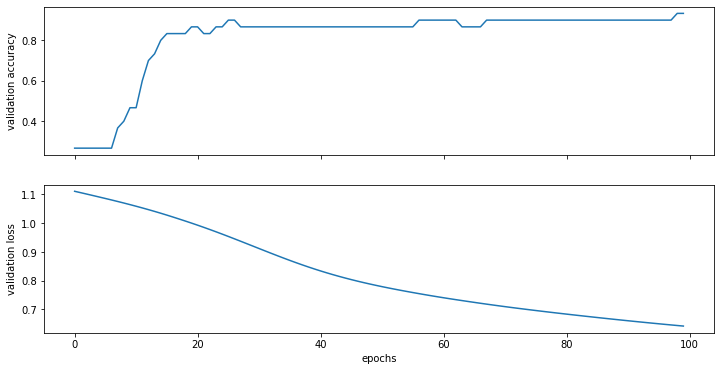

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

In [1]:
#Ans 1:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the number of input features
input_dim = 10

# Define the number of output classes
output_dim = 1

# Define the number of hidden layers to experiment with
hidden_layers = [1, 2, 3]

# Define other parameters
activation = 'relu'
learning_rate = 0.001
epochs = 10
batch_size = 32

# Generate sample data (random data for demonstration)
X_train = tf.random.normal(shape=(1000, input_dim))
y_train = tf.random.normal(shape=(1000, output_dim))

# Iterate over different numbers of hidden layers
for num_layers in hidden_layers:
    print(f"Training with {num_layers} hidden layer(s)")

    # Define the model
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation=activation))

    # Add hidden layers
    for _ in range(num_layers):
        model.add(Dense(64, activation=activation))

    # Add output layer
    model.add(Dense(output_dim, activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Training with 1 hidden layer(s)
Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 1.0491
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9791
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9627
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9423
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9293
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9116
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8993
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 0.8920
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8757
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8652
Training with 2 hidden layer(s)
Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.0182
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - 

In [2]:
#Ans 2:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the number of input features
input_dim = 10

# Define the number of output classes
output_dim = 1

# Define the number of neurons in hidden layers to experiment with
hidden_neurons = [32, 64, 128]

# Define other parameters
activation = 'relu'
learning_rate = 0.001
epochs = 10
batch_size = 32

# Generate sample data (random data for demonstration)
X_train = tf.random.normal(shape=(1000, input_dim))
y_train = tf.random.normal(shape=(1000, output_dim))

# Iterate over different numbers of neurons in hidden layers
for neurons in hidden_neurons:
    print(f"Training with {neurons} neurons in hidden layer(s)")

    # Define the model
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation=activation))

    # Add additional hidden layers (if needed)
    # model.add(Dense(neurons, activation=activation))

    # Add output layer
    model.add(Dense(output_dim, activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Training with 32 neurons in hidden layer(s)
Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 1.1820
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0621
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0125
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9845
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9655
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9508
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9373
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9266
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9169
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9070
Training with 64 neurons in hidden layer(s)
Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.0265
Epoch 2/10
32/32 [========================

In [3]:
#Ans 3:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, tanh, sigmoid
from tensorflow.keras.optimizers import Adam

# Define the number of input features
input_dim = 10

# Define the number of output classes
output_dim = 1

# Define the activation functions to experiment with
activation_functions = [relu, tanh, sigmoid]

# Define other parameters
num_neurons = 64
learning_rate = 0.001
epochs = 10
batch_size = 32

# Generate sample data (random data for demonstration)
X_train = tf.random.normal(shape=(1000, input_dim))
y_train = tf.random.normal(shape=(1000, output_dim))

# Iterate over different activation functions
for activation_fn in activation_functions:
    print(f"Training with {activation_fn.__name__} activation function")

    # Define the model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=input_dim, activation=activation_fn))

    # Add output layer
    model.add(Dense(output_dim, activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Training with relu activation function
Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.0388
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9581
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9329
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9200
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9064
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8963
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8898
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8844
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8787
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8697
Training with tanh activation function
Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.0672
Epoch 2/10
32/32 [==============================] - 